In [6]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data.txt", sep = '\t')
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [7]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

**Normalize the dataset to make the Logistic Regression training smoother**

In [9]:
X_train = (X_train - X_train.mean(axis = 0)) / X_train.std(axis = 0)

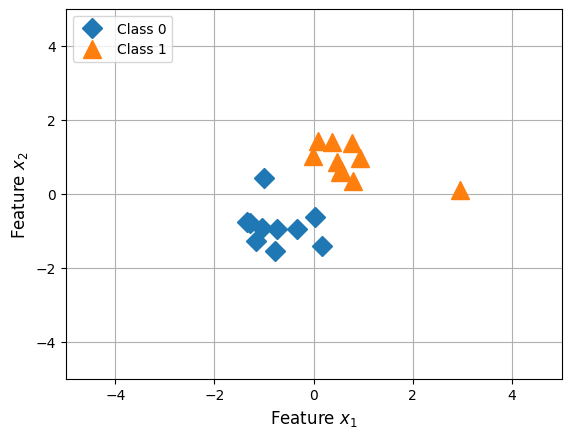

In [10]:
plt.plot(
  X_train[y_train == 0, 0],
  X_train[y_train == 0, 1],
  marker = "D",
  markersize = 10,
  linestyle = "",
  label = "Class 0"
)

plt.plot(
  X_train[y_train == 1, 0],
  X_train[y_train == 1, 1],
  marker = "^",
  markersize = 13,
  linestyle = "",
  label = "Class 1"
)

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

plt.grid()
plt.show()

## **Implement Logistic Regression using Pytorch**

In [21]:
class LogisticRegression(torch.nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.linear = torch.nn.Linear(num_features, 1)

  def forward(self, x):
    logits = self.linear(x)
    return torch.sigmoid(logits)

In [22]:
torch.manual_seed(200)
model = LogisticRegression(num_features = 2)

In [23]:
x = torch.tensor([1.1, 2.1])

# Disable the construction of computation graph in the background
with torch.no_grad():
  proba = model(x)

proba

tensor([0.7006])